In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Axis Limits

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
If you want to use just one of the 

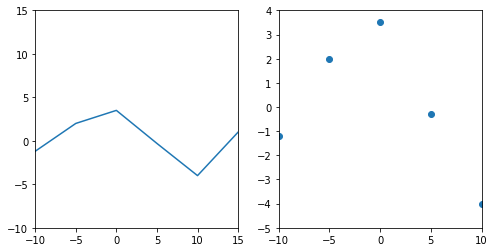

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.axis([-10, 15, -10, 15])
ax2.axis([-10, 10, -5, 4])

xmin, xmax, ymin, ymax = ax1.axis()

In [19]:
print("xmin=", xmin, "xmax=", xmax, "ymin=", ymin, "ymax=", ymax)

xmin= -10.0 xmax= 15.0 ymin= -10.0 ymax= 15.0


To specify only half of a limit, make sure to do so **after** a plot is made. This has the effect of allowing the user to anchor a limit while letting Matplotlib autoscale the rest of it.

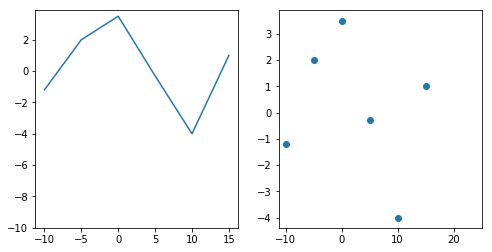

In [20]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
plt.show()

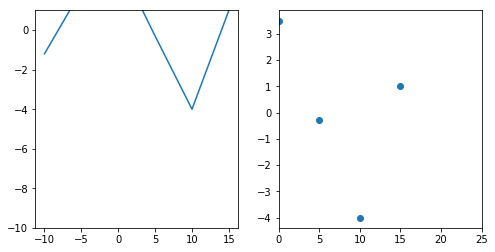

In [21]:
# Bad -- Setting limits before plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
plt.show()

You can also manually set all the limits.

# Dealing with the boundaries: Layout, ticks, spines, etc

One key thing we haven't talked about yet is all of the annotation on the outside of the axes, the borders of the axes, and how to adjust the amount of space around the axes.  We won't go over every detail, but this next section should give you a reasonable working knowledge of how to configure what happens around the edges of your axes.

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](https://matplotlib.org/api/axes_api.html#ticks-and-tick-labels) is often used to help configure your tickers.

### Using pyplot

([<matplotlib.axis.XTick at 0x1ab709a5438>,
 <a list of 4 Text xticklabel objects>)

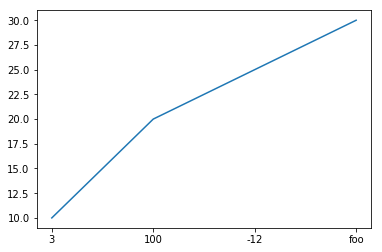

In [23]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xticks(range(1,5), [3, 100, -12, "foo"])

### Using `ax.xaxis.set` setter

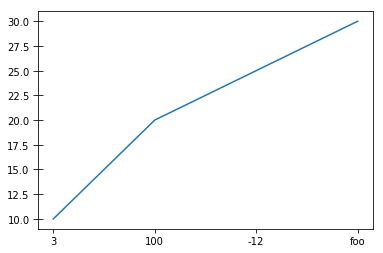

In [22]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='inout', length=10)


## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

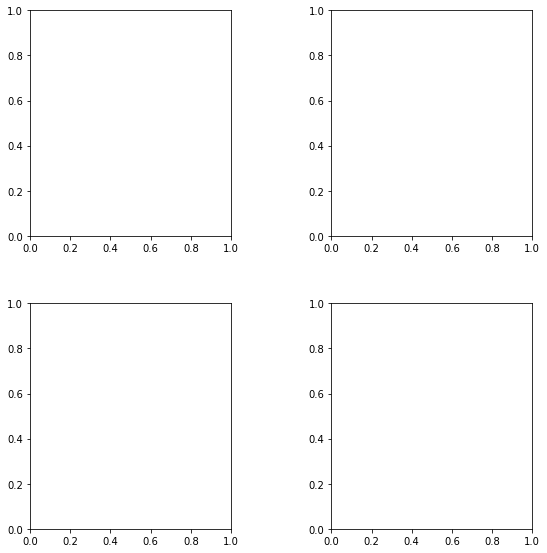

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)
plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

In [ ]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Enable fig.tight_layout to compare...
#fig.tight_layout()

plt.show()

## Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots to be "shared". Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains. Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2.plot([3, 4, 5, 6], [6, 5, 4, 3])
plt.show()

## "Twinning" axes
Sometimes one may want to overlay two plots on the same axes, but the scales may be entirely different. You can simply treat them as separate plots, but then twin them.

In [ ]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30])
ax1.set(xlabel='X', ylabel='First scale')
ax2.set(ylabel='Other scale')
plt.show()

# Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

In [ ]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
#ax.spines['bottom'].set_position(('outward', 10))
#ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
#ax.spines['bottom'].set_position(('axes', 0.75))
#ax.spines['left'].set_position(('axes', 0.3))

plt.show()

# Exercise 4.2

This one is a bit trickier.  Once again, try to reproduce the figure below:

<img src="images/exercise_4-2.png">


A few key hints: The two subplots have no vertical space between them (this means that the `hspace` is `0`). Note that the bottom spine is at 0 in data coordinates and the tick lines are missing from the right and top sides.

Because you're going to be doing a lot of the same things to both subplots, to avoid repitive code you might consider writing a function that takes an `Axes` object and makes the spine changes, etc to it. 



In [ ]:
%load exercises/4.2-spines_ticks_and_subplot_spacing.py

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Try to reproduce the figure shown in images/exercise_4.2.png
# This one is a bit trickier!

# Here's the data...
data = [('dogs', 4, 4), ('frogs', -3, 1), ('cats', 1, 5), ('goldfish', -2, 2)]
animals, friendliness, popularity = zip(*data)